In [105]:
!pip install dplython

C:\Users\Brett\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:131: ResourceWarning: unclosed file <_io.BufferedWriter name=6>
  return process_handler(cmd, _system_body)
C:\Users\Brett\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:131: ResourceWarning: unclosed file <_io.BufferedReader name=7>
  return process_handler(cmd, _system_body)
C:\Users\Brett\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:131: ResourceWarning: unclosed file <_io.BufferedReader name=8>
  return process_handler(cmd, _system_body)


In [75]:
import pandas as pd
import numpy as np
from dplython import (DplyFrame, X, diamonds, select, sift,
  sample_n, sample_frac, head, arrange, mutate, group_by,
  summarize, DelayFunction)
import matplotlib.pyplot as plt

## Some info about Statcast via Wikipedia:
### "Statcast is a high-speed, high-accuracy, automated tool developed to analyze player movements and athletic abilities in Major League Baseball (MLB). Statcast was introduced to all thirty MLB stadiums in 2015."

https://baseballsavant.mlb.com/

In [2]:
# I am using the dplython package for my EDA.
# The data contains every pitch Davis saw from the years 2015 and 2018.

cdavis = DplyFrame(pd.read_csv('Documents/cdavis.csv'))

In [3]:
cdavis.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
0,SL,2018-09-22,80.4,-1.6379,5.9318,Chris Davis,448801,656547,field_out,hit_into_play,...,2,2,2,2,2,2,2,2,Infield shift,Standard
1,FF,2018-09-22,91.9,-1.4752,6.0256,Chris Davis,448801,656547,NaN,foul,...,2,2,2,2,2,2,2,2,Infield shift,Standard
2,SL,2018-09-22,80.0,-1.5938,6.0229,Chris Davis,448801,656547,NaN,called_strike,...,2,2,2,2,2,2,2,2,Infield shift,Standard
3,KC,2018-09-22,82.9,-1.9125,5.9922,Chris Davis,448801,476454,strikeout,called_strike,...,2,2,2,2,2,2,2,2,Infield shift,Standard
4,FF,2018-09-22,97.9,-1.7483,6.2762,Chris Davis,448801,476454,NaN,ball,...,2,2,2,2,2,2,2,2,Infield shift,Standard


In [4]:
# Get a list of the names of the variables
cdavis.columns.values

array(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year',
       'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire',
       'sv_id', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle',
       'effective_speed', 'release_spin_rate', 'release_extension',
       'game_pk', 'pitcher.1', 'fielder_2.1', 'fielder_3', 'fielder_4',
       'fielder_5', 'fielder_6', 'fielder_7', 'fielder_8', 'fielder_9',
       'release_pos_y', 'estima

In [5]:
# Get the shape of the data
cdavis.shape

(4971, 89)

In [6]:
# I'd like to convert the game date to a datetime format so I can get separate the years.

cdavis['game_date'] = pd.to_datetime(cdavis['game_date'], format = '%Y-%m-%d')

In [7]:
cdavis['game_year'] = cdavis['game_date'].dt.year

In [24]:
# First example of where dplython shines. Dataframe manipulation with easy to read code.
# The chain operator '>>' lets me perform multiple operations with the same dataframe.
# Sift allows me to filter rows, in this case a Boolean where year == 2018.
# Select lets me select columns.

cd2018 = (cdavis >> 
          sift(X.game_year == 2018) >> 
          select(X.pitch_type, X.release_speed, X.launch_speed, X.launch_angle, X.estimated_woba_using_speedangle,
          X.woba_value, X.des, X.description))

In [25]:
cd2018.head(2)

,pitch_type,release_speed,launch_speed,launch_angle,estimated_woba_using_speedangle,woba_value,des,description
0,SL,80.4,96.8,5.0,0.513,0.0,Chris Davis lines out sharply to first baseman...,hit_into_play
1,FF,91.9,73.6,78.0,NaN,NaN,NaN,foul


In [21]:
# Same thing for 2015

cd2015 = (cdavis >> 
          sift(X.game_year == 2015) >> 
          select(X.pitch_type, X.release_speed, X.launch_speed, X.launch_angle, X.estimated_woba_using_speedangle,
          X.woba_value, X.des, X.description))

In [22]:
cd2015.head(2)

,pitch_type,release_speed,launch_speed,launch_angle,estimated_woba_using_speedangle,woba_value,des,description
2185,SL,87.6,109.2,27.0,1.949,2.0,Chris Davis homers (47) on a fly ball to right...,hit_into_play_score
2186,SL,88.4,NaN,NaN,NaN,NaN,NaN,called_strike


In [33]:
# Count the total number of pitches for 2015.

pitches_2015 = cd2015.index.size

I would like to group up each year by pitch type and start exploring whether he saw different pitch mixes and what the performance difference was between each year based on wOBA.

From Wikipedia: "In baseball, wOBA is a statistic, based on linear weights, designed to measure a player's overall offensive contributions per plate appearance."

Where average counts whether a player got a hit or not, wOBA weights those hits (eg. a homerun is worth more than a single).

In [98]:
# group_by allows me to group all pitches by pitch type.
# summarize allows me to create the aggregate values I am interested in.
# I am sifting for pitches that he saw more than 50 to eliminate pitches that are rare or not easily classified.

cd2015_bypitch = (cd2015 >> 
                  group_by(X.pitch_type) >> 
                  summarize(pitchwoba = X.woba_value.mean(), pcount = X.pitch_type.value_counts(), 
                            pmix_aspct = ((X.pitch_type.value_counts()/pitches_2015)*100).round(2).astype(str)+'%',
                            pmix = (X.pitch_type.value_counts()/pitches_2015),
                            avg_speed = X.release_speed.mean()) >>
                 sift(X.pcount > 50))
cd2015_bypitch

,pitch_type,pitchwoba,pcount,pmix_aspct,pmix,avg_speed
0,CH,0.360417,295,10.59%,0.105887,84.081695
1,CU,0.194068,263,9.44%,0.094401,77.811027
3,FC,0.478049,165,5.92%,0.059225,87.730909
4,FF,0.502479,1067,38.3%,0.382986,93.056888
5,FS,0.447500,63,2.26%,0.022613,84.052381
6,FT,0.287313,273,9.8%,0.097990,92.286447
8,KC,0.254167,76,2.73%,0.027279,81.121053
10,SI,0.373333,165,5.92%,0.059225,92.121818
11,SL,0.347619,390,14.0%,0.139986,84.035897


In [110]:
# total pitches for 2018

pitches_2018 = cd2018.index.size

In [97]:
# Same thing for 2018

cd2018_bypitch = (cd2018 >> 
                  group_by(X.pitch_type) >> 
                  summarize(pitchwoba = X.woba_value.mean(), pcount = X.pitch_type.value_counts(), 
                            pmix_aspct = ((X.pitch_type.value_counts()/pitches_2018)*100).round(2).astype(str)+'%',
                            pmix = (X.pitch_type.value_counts()/pitches_2018),
                            avg_speed = X.release_speed.mean()) >> 
                 sift(X.pcount > 50))
cd2018_bypitch

,pitch_type,pitchwoba,pcount,pmix_aspct,pmix,avg_speed
0,CH,0.328358,236,10.8%,0.108009,84.429237
1,CU,0.115116,184,8.42%,0.084211,78.657065
3,FC,0.275000,104,4.76%,0.047597,89.215385
4,FF,0.272289,813,37.21%,0.372082,93.236162
5,FS,0.120000,64,2.93%,0.029291,85.723438
6,FT,0.276364,222,10.16%,0.101602,91.688739
7,KC,0.227778,79,3.62%,0.036156,81.037975
9,SI,0.361842,173,7.92%,0.079176,91.553757
10,SL,0.159639,294,13.46%,0.134554,84.065306


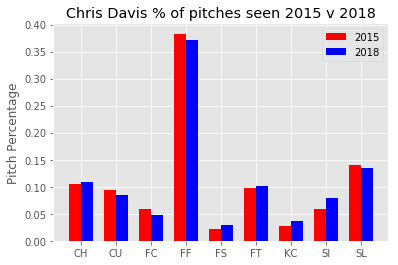

In [109]:
# Here I am plotting the percentage of pitches by year. Davis had fewer at bats in 2018 than 2015,
# so the raw pitch numbers would be deceiving.

plt.style.use('ggplot')
N = 9
pcount15 = cd2015_bypitch['pmix'].tolist()
pcount18 = cd2018_bypitch['pmix'].tolist()
ind = np.arange(N)
width = 0.35
fig = plt.figure()
ax = fig.add_subplot(111)
count15 = ax.bar(ind, pcount15, width, color = 'red')
count18 = ax.bar(ind+width, pcount18, width, color = 'blue')

ax.set_ylabel('Pitch Percentage')
ax.set_title('Chris Davis % of pitches seen 2015 v 2018')
ax.set_xticks(ind + width/2)
ax.set_xticklabels(cd2018_bypitch['pitch_type'].tolist())
ax.legend((count15[0],count18[0]),('2015','2018'))
plt.show()

Davis is getting a nearly identical pitch mix in 2018 as 2015.

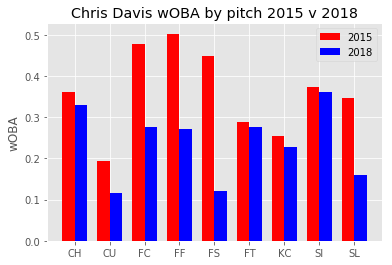

In [108]:
# Here I am getting a visualization of wOBA by pitch type in each year.

plt.style.use('ggplot')
N = 9
pwoba15 = cd2015_bypitch['pitchwoba'].tolist()
pwoba18 = cd2018_bypitch['pitchwoba'].tolist()
ind = np.arange(N)
width = 0.35
fig = plt.figure()
ax = fig.add_subplot(111)
count15 = ax.bar(ind, pwoba15, width, color = 'red')
count18 = ax.bar(ind+width, pwoba18, width, color = 'blue')

ax.set_ylabel('wOBA')
ax.set_title('Chris Davis wOBA by pitch 2015 v 2018')
ax.set_xticks(ind + width/2)
ax.set_xticklabels(cd2018_bypitch['pitch_type'].tolist())
ax.legend((count15[0],count18[0]),('2015','2018'))
plt.show()

## Conclusions
My initial thought after the 2018 season was that the league had adjusted to Chris Davis. This happens frequently in baseball, pitchers will find players can't hit certain types of pitches and throw them more frequently to that player. However, pitchers seemed to throw a nearly identical pitch mix to Davis in 2018 that they did in 2015.
Davis struggled on 4 pitches in particular in 2018 that he excelled at hitting in 2015: Cutters, Four-seam Fastballs, Splitters, and Sliders. Most troubling is his decline in hitting four seam fastballs. The most likely scenario here is that his hand speed has slowed down through the zone.